# Order-to-cash process

### Table of Contents

* [Data Extraction Checklist](#DataExtractionChecklist)
* [Data Quality Check](#DataQualityCheck)
* [Data Transformation](#DataTransformation)
* [Process Discovery](#ProcessDiscovery)
    * [Variant Analysis](#VariantAnalysis)
    * [Process Flow Graph](#ProcessFlowGraph)
    * [Transition Matrix](#TransitionMatrix)
* [Timing Analysis](#TimingAnalysis)
    * [Case Duration](#CaseDuration)
    * [Event Duration](#EventDuration)
* [Users](#Users)

## Data Extraction Checklist<a class="anchor" id="DataExtractionChecklist"></a>

### 1. Which Process?

##### Order-to-cash process
Order-to-cash process is the process which a company use to manage order from its vendors. It starts when a company receives an order up until those goods are issued and payment is received. The order-to-cash process is recognised as one of the most important processes within a company because it helps companies to carry out its primary activities and strongly influences the availability of cash for daily operations.

The dataset was gotten from https://github.com/IBM/processmining. IBM Github repository for process mining.

The order request (event log) is structured as follows: The dataset comprise of 45825 order request (cases) and 251478 events.

### 2. Questions about Process?
Since no information was given about the expected process, this analysis is done to discover the actual process flow, identify bottlenecks and areas for improvement. 

### 3. Which IT System?
The IT system where the log was extracted from was not specified.

### 4. Case ID?
The <b>Key</b> column will be used as the case ID column.

### 5. Activities
The <b>Activity</b> column contains 19 activities which were performed over these cases. These activities include:
1. Delivery
2. Good Issue
3. Line Creation                       
4. LgstCheckOnConfDat Removed          
5. Header Block Removed                
6. Sched.Line Changed Delivery Date    
7. Document released for credit         
8. Schedule Line Rejected               
9. Address missing Block Set            
10. Address missing Block Removed        
11. LgstCheckOnConfDat Set               
12. Sched.Line Block Removed              
13. CTR Block Removed                     
14. Document blocked for credit           
15. Header Block Set                      
16. Sched.Line Block Set                  
17. Special test Block Set                
18. Special test Block Removed            
19. CTR Block Set                         

### 6. Timestamps
The date column shows the timestamp.

### 7. Other attributes
The dataset contains other attributes some of which includes:
* User: The user who carried out the activity
* Role: The role/department of the user
* Product_hierarchy: The product hierarchy being ordered
* NetValue: Net value of the order
* Customer: The customer who made the order
* OrderType: The type of order made
* Delayed: Indicates if an order was delayed or on time
* User_Type: The type of user (Human or Robot)

### 8. Selection method
In analysing processes, it is important to consider only finished cases. In this process, an order starts with a <b>Line Creation</b> activity and ends with either <b>Goods Issue</b> or <b>Schedule Line Rejected</b>.

### 9. Timeframe
The dataset contains cases from 2nd January 2016 until 7th December 2017.

In [1]:
import pandas as pd
import numpy as np
import graphviz

In [2]:
df = pd.read_csv("o2c_crypted.csv", thousands='.', decimal=',')
df

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3508: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,7020029102_10,04/01/2016 13:46:13,User1,Line Creation,Customer Service Representative,TLC Optical Cables,773.87,767,NaN,NaN,...,IN TIME,1.452726e+12,1.452726e+12,Manual,Human,no change,With change,no block,With block,LocalFamily1
1,7020029103_10,04/01/2016 13:46:55,User1,Line Creation,Customer Service Representative,TLC Optical Cables,706.50,767,NaN,NaN,...,IN TIME,1.482102e+12,1.452812e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
2,7020029104_10,04/01/2016 13:47:30,User1,Line Creation,Customer Service Representative,TLC Optical Cables,2168.40,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
3,7020029104_20,04/01/2016 13:47:38,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1566.60,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily3
4,7020029104_30,04/01/2016 13:47:43,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1106.85,767,NaN,NaN,...,IN TIME,1.482102e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251473,7020034883_90,11/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251474,7020034883_90,11/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251475,7020030338_150,12/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,89136.00,767,7.050145e+09,07/05/18,...,IN TIME,1.525040e+12,1.501020e+12,Manual,Human,no change,With change,no block,With block,LocalFamily13
251476,7020033072_100,13/07/2017 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,17013.15,767,7.050145e+09,01/08/17,...,IN TIME,1.500930e+12,1.500930e+12,Manual,Human,no change,With change,no block,With block,LocalFamily8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251478 entries, 0 to 251477
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Key                251478 non-null  object 
 1   Date               251478 non-null  object 
 2   User               251478 non-null  object 
 3   Activity           251478 non-null  object 
 4   Role               251478 non-null  object 
 5   Product_hierarchy  251478 non-null  object 
 6   NetValue           251478 non-null  float64
 7   Company            251478 non-null  int64  
 8   Delivery           110283 non-null  float64
 9   Delivery_Date      110276 non-null  object 
 10  Good_Issue_Date    251478 non-null  float64
 11  Difference         110283 non-null  float64
 12  Customer           251478 non-null  object 
 13  OrderType          251478 non-null  object 
 14  clientCode         251478 non-null  object 
 15  NotInTime          251478 non-null  int64  
 16  De

In [4]:
df.isnull().sum()

Key                       0
Date                      0
User                      0
Activity                  0
Role                      0
Product_hierarchy         0
NetValue                  0
Company                   0
Delivery             141195
Delivery_Date        141202
Good_Issue_Date           0
Difference           141195
Customer                  0
OrderType                 0
clientCode                0
NotInTime                 0
Delayed                   0
PromiseMAD                0
ActualMAD                 0
Execution_Status       3182
User_Type              3182
Change_Status             0
ID_Change_Status          0
Block_Status              0
ID_Block_Status           0
Local_Family_code     71566
dtype: int64

In [5]:
df['Activity'].value_counts()

Delivery                            55215
Good Issue                          55068
Line Creation                       45825
LgstCheckOnConfDat Removed          40292
Header Block Removed                25681
Sched.Line Changed Delivery Date    14287
Document released for credit         4820
Schedule Line Rejected               3182
Address missing Block Set            1412
Address missing Block Removed        1380
LgstCheckOnConfDat Set               1296
Sched.Line Block Removed              972
CTR Block Removed                     943
Document blocked for credit           638
Header Block Set                      451
Sched.Line Block Set                    6
Special test Block Set                  5
Special test Block Removed              4
CTR Block Set                           1
Name: Activity, dtype: int64

## Data Quality Check <a class="anchor" id="DataQualityCheck"></a>

#### 1. Any errors during import?
After importing the event log, it was noticed that the startTime is not recognised as a timestamp in python.

#### 2. Empty values in the dataset?

The following columns had empty rows
* Delivery
* Delivery_Date
* Difference
* Execution_Status
* Local_Family_code
* User_Type

#### 3. Missing attributes?

| No. | column | No. of empty rows | Explanation |
| :--- | :--- | :---: | :--- |
| 1 | User_Type | 3,182 |This column indicates the type of user who carries out the activity. It indicates of it is a Human or a Robot that does this activity | 

In addition to the above, it was noticed that the NetValue might not be correct for all order.

<b>Note</b>: After filtering for completed cases, the User_Type column in the final eventlog did not contain any empty row. This means that there was likely an error while extracting the eventlog. 

#### 4. Disclaimer:
No process owner was contacted to gain further understanding of other columns

## Data Transformation<a class="anchor" id="DataTransformation"></a>

### Correcting the timestamp format

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,7020029102_10,2016-04-01 13:46:13,User1,Line Creation,Customer Service Representative,TLC Optical Cables,773.87,767,NaN,NaN,...,IN TIME,1.452726e+12,1.452726e+12,Manual,Human,no change,With change,no block,With block,LocalFamily1
1,7020029103_10,2016-04-01 13:46:55,User1,Line Creation,Customer Service Representative,TLC Optical Cables,706.50,767,NaN,NaN,...,IN TIME,1.482102e+12,1.452812e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
2,7020029104_10,2016-04-01 13:47:30,User1,Line Creation,Customer Service Representative,TLC Optical Cables,2168.40,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
3,7020029104_20,2016-04-01 13:47:38,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1566.60,767,NaN,NaN,...,IN TIME,1.453417e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily3
4,7020029104_30,2016-04-01 13:47:43,User1,Line Creation,Customer Service Representative,TLC Optical Cables,1106.85,767,NaN,NaN,...,IN TIME,1.482102e+12,1.453417e+12,Manual,Human,no change,With change,no block,With block,LocalFamily2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251473,7020034883_90,2017-11-07 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251474,7020034883_90,2017-11-07 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,59994.48,767,7.050145e+09,02/08/17,...,IN TIME,1.500930e+12,1.500590e+12,Manual,Human,no change,With change,no block,With block,LocalFamily9
251475,7020030338_150,2017-12-07 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,89136.00,767,7.050145e+09,07/05/18,...,IN TIME,1.525040e+12,1.501020e+12,Manual,Human,no change,With change,no block,With block,LocalFamily13
251476,7020033072_100,2017-07-13 23:59:59,User66,Good Issue,Customer Service Representative,TLC Optical Cables,17013.15,767,7.050145e+09,01/08/17,...,IN TIME,1.500930e+12,1.500930e+12,Manual,Human,no change,With change,no block,With block,LocalFamily8


In [7]:
df.Date.min()

Timestamp('2016-01-02 04:29:23')

In [8]:
df.Date.max()

Timestamp('2017-12-07 23:59:59')

In [9]:
df['Activity'].value_counts()

Delivery                            55215
Good Issue                          55068
Line Creation                       45825
LgstCheckOnConfDat Removed          40292
Header Block Removed                25681
Sched.Line Changed Delivery Date    14287
Document released for credit         4820
Schedule Line Rejected               3182
Address missing Block Set            1412
Address missing Block Removed        1380
LgstCheckOnConfDat Set               1296
Sched.Line Block Removed              972
CTR Block Removed                     943
Document blocked for credit           638
Header Block Set                      451
Sched.Line Block Set                    6
Special test Block Set                  5
Special test Block Removed              4
CTR Block Set                           1
Name: Activity, dtype: int64

In [10]:
df.columns

Index(['Key', 'Date', 'User', 'Activity', 'Role', 'Product_hierarchy',
       'NetValue', 'Company', 'Delivery', 'Delivery_Date', 'Good_Issue_Date',
       'Difference', 'Customer', 'OrderType', 'clientCode', 'NotInTime',
       'Delayed', 'PromiseMAD', 'ActualMAD', 'Execution_Status', 'User_Type',
       'Change_Status', 'ID_Change_Status', 'Block_Status', 'ID_Block_Status',
       'Local_Family_code'],
      dtype='object')

In [11]:
df= df.sort_values(by=['Key','Date'],ascending=True).reset_index(drop=True)

### Filtering for completed cases

From the below, I noticed that the dataframe contains 15 different start activities and 14 different end activities. I believe that this is because of the way the eventlog was extracted. From the above, you can see that the earliest date is on the 2nd January 2016 to 7th December 2017. The data will include all order ID irrespective of where the order request was in the process.

To carry out an end-to-end process analysis, we would focus on those completed order. To do this, we will filter for those cases which starts with <b>Line creation</b> and ends with <b>Goods Issue</b>

In [12]:
df_2 = df.copy()
df_2

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-05-01 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-06-01 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-06-01 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-07-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaN,...,IN TIME,0.0,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251473,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaN,...,DELAYED,0.0,1.499378e+12,Manual,Human,no change,Without change,block,With block,LocalFamily13
251474,7080001018_40,2017-07-13 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,07/07/17,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
251475,7080001018_40,2017-11-07 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,07/07/17,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
251476,7080001026_10,2017-07-13 19:38:08,User5,Line Creation,Customer Service Representative,TLC Optical Cables,4990.43,767,NaN,NaN,...,IN TIME,0.0,1.499897e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily47


In [13]:
df_2['Key'].nunique()

45825

In [14]:
def func(x):
    # Get the last valid index (last activity per case)
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]

def activity_list(df, case_id, activities):
    # Get the last and first activity for each case
    activities_list = df.copy()
    activities_list['Count'] = activities_list.groupby(case_id).cumcount()+1
    activities_list = activities_list.pivot(index=case_id, columns='Count', values=activities)

    activities_list['Last Activity'] = activities_list.apply(func, axis=1)
    activities_list['First Activity'] = activities_list[1]
    return activities_list

In [15]:
df_xtract = activity_list(df_2,'Key','Activity')
df_xtract

Count,1,2,3,4,5,6,7,8,9,10,...,382,383,384,385,386,387,388,389,Last Activity,First Activity
Key,,,,,,,,,,,,,,,,,,,,,
0009000481_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000485_10,Line Creation,LgstCheckOnConfDat Set,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000486_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_10,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
0009000487_100,Line Creation,LgstCheckOnConfDat Removed,Delivery,Good Issue,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7080001011_20,Line Creation,Header Block Removed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Header Block Removed,Line Creation
7080001014_30,Line Creation,Header Block Removed,Delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delivery,Line Creation
7080001017_20,Line Creation,Header Block Removed,Delivery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delivery,Line Creation


In [16]:
df_xtract['First Activity'].value_counts()

Line Creation                       30067
Delivery                             7088
Header Block Removed                 2854
LgstCheckOnConfDat Removed           2705
Sched.Line Changed Delivery Date     1256
Good Issue                           1178
Document released for credit          252
Address missing Block Removed         136
Sched.Line Block Removed              113
Document blocked for credit            46
Address missing Block Set              37
CTR Block Removed                      30
Schedule Line Rejected                 28
Header Block Set                       25
LgstCheckOnConfDat Set                 10
Name: First Activity, dtype: int64

In [17]:
df_xtract['Last Activity'].value_counts()

Good Issue                          24028
LgstCheckOnConfDat Removed           7436
Line Creation                        4655
Delivery                             3453
Schedule Line Rejected               2595
Header Block Removed                 1510
Sched.Line Changed Delivery Date     1345
Document released for credit          350
Address missing Block Removed         186
Address missing Block Set             108
Document blocked for credit            57
LgstCheckOnConfDat Set                 44
CTR Block Removed                      37
Header Block Set                       21
Name: Last Activity, dtype: int64

In [18]:
df_final = df_xtract.reset_index()
df_final = df_final[(df_final['First Activity'] == 'Line Creation') & 
                    ((df_final['Last Activity'] == 'Good Issue') | (df_final['Last Activity'] == 'Schedule Line Rejected'))]
# df_final = df_final[(df_final['First Activity'] == 'Line Creation') & (df_final['Last Activity'] == 'Good Issue')]
df_final = df_final[['Key']]
df_final = df_final.merge(df_2, on='Key')
df_final

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000481_10,2016-05-01 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000481_10,2016-06-01 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,IN TIME,0.0,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN
2,0009000481_10,2016-06-01 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000481_10,2016-07-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,IN TIME,0.0,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaN,...,IN TIME,0.0,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110120,7080000961_10,2017-11-05 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,473.50,767,7.090001e+09,20/04/17,...,DELAYED,0.0,1.492640e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily35
110121,7080001003_10,2017-06-19 23:04:18,User19,Line Creation,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,DELAYED,0.0,1.497823e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily77
110122,7080001003_10,2017-06-19 23:07:17,User19,Header Block Removed,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,DELAYED,0.0,1.497823e+12,Manual,Human,no change,Without change,block,With block,LocalFamily77
110123,7080001003_10,2017-06-20 17:16:20,User60,Delivery,System Automatic Job,TLC Optical Cables,49913.00,767,7.090001e+09,19/06/17,...,DELAYED,0.0,1.497820e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77


In [19]:
df_final = df_final.sort_values(by=['Key','Date'],ascending=True).reset_index(drop=True)
df_final['Duration'] = df_final.groupby(['Key'])['Date'].diff().dt.days
df_final['Duration'] = df_final['Duration'].fillna(0)
df_final['Event_ID'] = df_final.groupby(['Date']).cumcount()+1
df_final

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Duration,Event_ID
0,0009000481_10,2016-05-01 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,1.452035e+12,Manual,Human,no change,Without change,no block,With block,NaN,0.0,1
1,0009000481_10,2016-06-01 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,1.452035e+12,Manual,Human,no change,Without change,block,With block,NaN,30.0,1
2,0009000481_10,2016-06-01 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN,0.0,1
3,0009000481_10,2016-07-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,1.452030e+12,Automatic,Robot,no change,Without change,no block,With block,NaN,30.0,1
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaN,...,1.452726e+12,Manual,Human,no change,Without change,no block,With block,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110120,7080000961_10,2017-11-05 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,473.50,767,7.090001e+09,20/04/17,...,1.492640e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily35,0.0,105
110121,7080001003_10,2017-06-19 23:04:18,User19,Line Creation,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,1.497823e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily77,0.0,1
110122,7080001003_10,2017-06-19 23:07:17,User19,Header Block Removed,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,1.497823e+12,Manual,Human,no change,Without change,block,With block,LocalFamily77,0.0,1
110123,7080001003_10,2017-06-20 17:16:20,User60,Delivery,System Automatic Job,TLC Optical Cables,49913.00,767,7.090001e+09,19/06/17,...,1.497820e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily77,0.0,1


In [20]:
df_final['duplicates_id'] = df_final.groupby(["Key", "Activity"]).transform('cumcount')
df_final['Rework'] = df_final.apply(lambda x: 'Non_Duplicate' if x['duplicates_id'] == 0 else 'Duplicate',axis=1)
df_final

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Duration,Event_ID,duplicates_id,Rework
0,0009000481_10,2016-05-01 17:10:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,Human,no change,Without change,no block,With block,NaN,0.0,1,0,Non_Duplicate
1,0009000481_10,2016-06-01 16:07:53,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,6920.00,767,NaN,NaN,...,Human,no change,Without change,block,With block,NaN,30.0,1,0,Non_Duplicate
2,0009000481_10,2016-06-01 18:05:04,User61,Delivery,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,Robot,no change,Without change,no block,With block,NaN,0.0,1,0,Non_Duplicate
3,0009000481_10,2016-07-01 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Fibres,6920.00,767,7.070100e+09,08/01/16,...,Robot,no change,Without change,no block,With block,NaN,30.0,1,0,Non_Duplicate
4,0009000485_10,2016-01-14 19:07:11,User16,Line Creation,NA Fiber Sales and Service Manager,TLC Optical Fibres,735.25,767,NaN,NaN,...,Human,no change,Without change,no block,With block,NaN,0.0,1,0,Non_Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110120,7080000961_10,2017-11-05 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Cables,473.50,767,7.090001e+09,20/04/17,...,Robot,no change,Without change,no block,With block,LocalFamily35,0.0,105,0,Non_Duplicate
110121,7080001003_10,2017-06-19 23:04:18,User19,Line Creation,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,Human,no change,Without change,no block,With block,LocalFamily77,0.0,1,0,Non_Duplicate
110122,7080001003_10,2017-06-19 23:07:17,User19,Header Block Removed,Customer Service Manager,TLC Optical Cables,49913.00,767,NaN,NaN,...,Human,no change,Without change,block,With block,LocalFamily77,0.0,1,0,Non_Duplicate
110123,7080001003_10,2017-06-20 17:16:20,User60,Delivery,System Automatic Job,TLC Optical Cables,49913.00,767,7.090001e+09,19/06/17,...,Robot,no change,Without change,no block,With block,LocalFamily77,0.0,1,0,Non_Duplicate


In [21]:
df_final.to_csv('O2C_SAP_log.csv', index=False)

In [22]:
df_final['Activity'].value_counts()

Delivery                            23674
Good Issue                          23672
Line Creation                       21159
LgstCheckOnConfDat Removed          19720
Header Block Removed                10830
Sched.Line Changed Delivery Date     5168
Schedule Line Rejected               2488
Document released for credit         1607
LgstCheckOnConfDat Set                479
Sched.Line Block Removed              354
Address missing Block Removed         305
Address missing Block Set             293
CTR Block Removed                     212
Header Block Set                      100
Document blocked for credit            60
Sched.Line Block Set                    2
Special test Block Set                  2
Name: Activity, dtype: int64

In [23]:
with pd.option_context('display.max_rows', None):
  display(df_final.groupby(['Product_hierarchy','OrderType']).agg({'Key':['nunique'],'NetValue':['sum']}))

Key      NetValue
                                               nunique           sum
Product_hierarchy         OrderType                                 
TLC Connectivity          US-Std. Order             85  4.075190e+06
TLC Optical Cables        US-Consignm. Issue       282  1.471560e+06
                          US-Consignm.Fill-Up       27  0.000000e+00
                          US-Free of charge        227  0.000000e+00
                          US-Return Order          152  1.044638e+07
                          US-Std. I/C Order        192  7.609645e+07
                          US-Std. Order          11365  9.936535e+08
                          ZUH2                       5  3.153259e+05
TLC Optical Fibres        US-IC Order Fiber       5968  3.253250e+08
                          US-Internal Transfer    1698  6.520718e+07
                          US-Return Order            1  1.402800e+03
                          US-Std. Order Fiber     1098  3.154355e+07
                          ZUHI                      10  8.665380e+03
TLC Optical Ground Cables US-Std. Order             49  5.454226e+06

In [24]:
df_final.isnull().sum()

Key                      0
Date                     0
User                     0
Activity                 0
Role                     0
Product_hierarchy        0
NetValue                 0
Company                  0
Delivery             62779
Delivery_Date        62779
Good_Issue_Date          0
Difference           62779
Customer                 0
OrderType                0
clientCode               0
NotInTime                0
Delayed                  0
PromiseMAD               0
ActualMAD                0
Execution_Status      2488
User_Type             2488
Change_Status            0
ID_Change_Status         0
Block_Status             0
ID_Block_Status          0
Local_Family_code    41622
Duration                 0
Event_ID                 0
duplicates_id            0
Rework                   0
dtype: int64

# Process Discovery<a class="anchor" id="ProcessDiscovery"></a>

## Product Hierarchy

From the above, we can see that there are 4 product hierarchy and 10 different order types. I anticipate that these different product hierarchies would most likely have different traces. Therefore, the dataset would be analysed based on the different product hierarchies.

In this Notebook, I would focus on the TLC Optical cables because it has most cases. However, I will do similar analysis using the filters on Microsoft PowerBI.

In [25]:
tlc_conn = df_final[df_final['Product_hierarchy'] == 'TLC Connectivity']
opt_cab = df_final[df_final['Product_hierarchy'] == 'TLC Optical Cables']
opt_fib = df_final[df_final['Product_hierarchy'] == 'TLC Optical Fibres']
opt_gro_cab = df_final[df_final['Product_hierarchy'] == 'TLC Optical Ground Cables']

In [26]:
# Define the following variables
caseid = 'Key'
activity = 'Activity'
timestamp = 'Date'
dataframe = opt_cab

### Variant analysis<a class="anchor" id="VariantAnalysis"></a>

Here, we look at the various traces in each case and identify similar traces. These individual traces are also called variants. The purpose of this is to see how many cases follow the same exact process. From our analysis, it can be seen that there are a total of 
* TLC Optical Cables with 10,924 orders has 699 variants. Variant 1 occured in 43% of the cases.
* TLC Optical Fibres with 7,641 orders has 63 variants. Variant 1 occured in 82% of the cases.
* TLC Connectivity with 85 orders has 17 variants with the top 2 variants occuring in 73% of the cases
* TLC Optical ground cables with 21 orders has 11 variants with the top 3 variants occuring in 62% of the cases and the remaining 8 variants occuring once.

Further analysis will be done on Microsoft PowerBI.

In [27]:
# Variants
def variant_analysis(df,case_id, activities):
    # Get the process variants
    variants = df.copy()
    variants['Count'] = variants.groupby(case_id).cumcount()+1
    variants = variants.pivot(index=case_id, columns='Count', values=activities)
    variants_col = variants.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants = variants.fillna('X')
    variants = variants.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
    variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Group the similar variants and get the count
    variants_sum = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
    variants_sum = variants_sum.sort_values(by=1, ascending=False).reset_index()
    del variants_sum['index']
    variants_sum = variants_sum.reset_index()
    variants_sum['index'] = variants_sum['index']+1
    variants_sum = variants_sum.rename(columns={'index':'Variants',1:'No of occurance'})
    return variants_sum

In [28]:
variants = variant_analysis(dataframe, caseid, activity)
variants

Count,Variants,Trace,No of occurance
0,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718
1,2,"Line Creation,LgstCheckOnConfDat Removed,Sched...",927
2,3,"Line Creation,LgstCheckOnConfDat Removed,Heade...",671
3,4,"Line Creation,Header Block Removed,Document re...",526
4,5,"Line Creation,Header Block Removed,LgstCheckOn...",483
...,...,...,...
721,722,"Line Creation,Header Block Removed,LgstCheckOn...",1
722,723,"Line Creation,Header Block Removed,LgstCheckOn...",1
723,724,"Line Creation,Header Block Removed,LgstCheckOn...",1
724,725,"Line Creation,Header Block Removed,LgstCheckOn...",1


In [29]:
list(variants['Trace'][:5])

['Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,LgstCheckOnConfDat Removed,Schedule Line Rejected',
 'Line Creation,LgstCheckOnConfDat Removed,Header Block Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,Document released for credit,LgstCheckOnConfDat Removed,Delivery,Good Issue',
 'Line Creation,Header Block Removed,LgstCheckOnConfDat Removed,Sched.Line Changed Delivery Date,Delivery,Good Issue']

In [30]:
variants['No of occurance'].value_counts()

1       459
2        89
3        35
5        22
4        18
8        10
12        8
6         8
7         8
9         7
10        6
11        4
18        2
43        2
27        2
50        2
24        2
23        2
14        2
16        2
79        2
35        2
21        1
15        1
26        1
34        1
13        1
28        1
33        1
4718      1
927       1
38        1
671       1
526       1
483       1
382       1
356       1
287       1
277       1
212       1
182       1
128       1
118       1
114       1
103       1
73        1
67        1
65        1
64        1
62        1
60        1
52        1
49        1
37        1
Name: No of occurance, dtype: int64

In [31]:
def variant_analysis_df(df,case_id, activities):
    # Get the process variants
    variants_df = df.copy()
    variants_df['Count'] = variants_df.groupby(case_id).cumcount()+1
    variants_df = variants_df.pivot(index=case_id, columns='Count', values=activities)
    variants_df_col = variants_df.columns
    
    # Fill the empty cells (NaN) with 'X'
    variants_df = variants_df.fillna('X')
    variants_df = variants_df.astype('str')
    
    # Get the trace of each case by joining all the columns together, separated by a comma (,) and replace ',X' with nothing to delete the ',X'
    variants_df['Trace'] = variants_df.apply(lambda x: ','.join(x),axis=1)
    variants_df['Trace'] = variants_df['Trace'].apply(lambda x: x.replace(',X',''))
    
    # Merge with the variants_analysis df
    variants = variant_analysis(df, case_id, activities)
    variants_df = variants.merge(pd.DataFrame(variants_df).reset_index(), on='Trace')
    variants_df = variants_df.drop(variants_df_col, axis=1)
    return variants_df

In [32]:
distinct_df = variant_analysis_df(opt_cab, caseid, activity)
distinct_df

Count,Variants,Trace,No of occurance,Key
0,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718,7020029130_20
1,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718,7020029150_40
2,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718,7020029154_10
3,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718,7020029157_10
4,1,"Line Creation,Header Block Removed,LgstCheckOn...",4718,7020029160_10
...,...,...,...,...
12245,722,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020036817_10
12246,723,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020045551_10
12247,724,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020040170_10
12248,725,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020045191_10


In [33]:
tlc_conn_var = variant_analysis_df(tlc_conn, caseid, activity)
opt_cab_var = variant_analysis_df(opt_cab, caseid, activity)
opt_fib_var  = variant_analysis_df(opt_fib, caseid, activity)
opt_gro_cab_var = variant_analysis_df(opt_gro_cab, caseid, activity)

### Process Flow Graph<a class="anchor" id="ProcessFlowGraph"></a>

This process graph aims to show how the cases flow from one activity to another at a glance. It also shows the amount for each transitions.
Steps:
* Identify the start events using the start_activities function
* Identify the various end events using the end_activities function
* Using the process_detais function, generate the process flow from one event to another and count the number of times this occurs. This will be used to draw the process graph and the labels of the graph will show the counts.
* Using the graph_count function, get the total number of times a particular activity occurs in the extracted event log. This is included as a label in the node.
* Draw the process flow graph

The gaph might not be very visible here. It will be further analysed and better visualised in Microsoft PowerBI.

In [34]:
# Start Activities
def start_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    start_act = activities_list.groupby(['First Activity']).size()
    start_act = start_act.to_frame(name='Count').reset_index()
    start_act['Start'] = 'Start'
    start_act = start_act[['Start','First Activity','Count']]
    start_act = start_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return start_act

In [35]:
# End Activities
def end_activities(df, case_id, activities):
    activities_list = activity_list(df, case_id, activities)
    end_act = activities_list.groupby(['Last Activity']).size()
    end_act = end_act.to_frame(name='Count').reset_index()
    end_act['End'] = 'End'
    end_act = end_act[['End','Last Activity','Count']]
    end_act = end_act.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return end_act

In [36]:
# Process details
def process_details(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    df_1 = df_1[[case_id, activities, activities+'_2']]
    df_1 = df_1.groupby([activities,activities+'_2'], sort=False).size()
    df_1 = df_1.to_frame(name='Count').reset_index()
    return df_1

In [37]:
# Graph count
def graph_count(df, activities):
    graph_count = df.copy()
    graph_count = graph_count[activities].value_counts().to_frame().reset_index().rename(columns={'index':activities, activities:'Count'})
    return graph_count

In [38]:
start_act = start_activities(opt_cab, caseid, activity)
start_act

,Start,First Activity,Count
0,Start,Line Creation,12250


In [39]:
end_act = end_activities(opt_cab, caseid, activity)
end_act

,End,Last Activity,Count
0,End,Good Issue,10924
1,End,Schedule Line Rejected,1326


In [40]:
pro_det = process_details(opt_cab, caseid, timestamp, activity)
pro_det

,Activity,Activity_2,Count
0,Line Creation,Sched.Line Changed Delivery Date,1400
1,Sched.Line Changed Delivery Date,Header Block Removed,1229
2,Header Block Removed,LgstCheckOnConfDat Removed,7139
3,LgstCheckOnConfDat Removed,Delivery,7329
4,Delivery,Good Issue,10907
...,...,...,...
117,Header Block Removed,Address missing Block Removed,3
118,Header Block Set,Good Issue,1
119,Address missing Block Set,LgstCheckOnConfDat Set,2
120,Document blocked for credit,Good Issue,3


In [41]:
gra_coun = graph_count(opt_cab, activity)
gra_coun

,Activity,Count
0,Delivery,15046
1,Good Issue,15044
2,Line Creation,12250
3,LgstCheckOnConfDat Removed,10928
4,Header Block Removed,10677
5,Sched.Line Changed Delivery Date,4080
6,Document released for credit,1466
7,Schedule Line Rejected,1326
8,LgstCheckOnConfDat Set,443
9,Sched.Line Block Removed,314


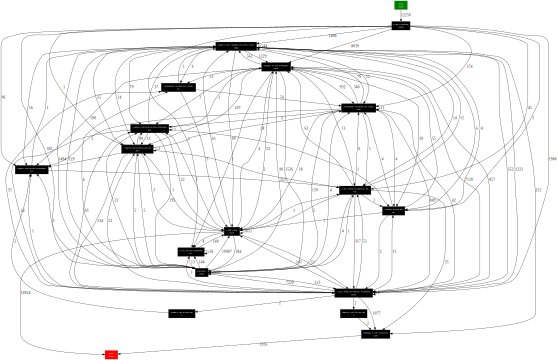

In [42]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

# max_node = 5
# max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Count'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Count'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, count = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in pro_det.iterrows():
    g.node(row[activity],label=row[activity] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity]]['Count'].sum()))
    g.node(row[activity+'_2'],label=row[activity+'_2'] + '\n '+ str(gra_coun[gra_coun[activity] == row[activity+'_2']]['Count'].sum()))

for index, row in pro_det.iterrows():
    startevent, endevent, count = [str(i) for i in row]
    g.edge(str(row[activity]), str(row[activity+'_2']), label= "  " + count)
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(gra_coun[gra_coun[activity] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Count'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, count = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + count)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

### Transition Matrix<a class="anchor" id="TransitionMatrix"></a>

The aim of this transition matrix shows how the cases moves from one event to another. The row shows the starting event, while the column shows the preceeding events, while the numbers indicates how many times this was done. For example, <b><i>Address mising block removed</i></b> was followed by <b><i>Address missing block set</i></b> 13 times. 

The following were noted:

* <b>Repeated actvities:</b> There are some activities that are done repeatedly.

| No. | Activity | Occurrence | Product hierarchy | No. of customers | No. of orders |
| :--- | :--- | :---: | :--- | :---: | :---: |
| 1 | Document released for credit | 11 |TLC Optical Cables | 7 | 11 |
| 2 | Address mising block removed | 5 | TLC Optical Cables | 1 | 1 |
| 3 | CTR Block Removed | 58 | TLC Optical Cables | 5 | 14 |
| 4 | Sched.Line Changed Delivery Date | 476 | TLC Optical Cables | 48 | 379 |

From the above, these activities are all repeated on the TLC Optical Cables product. Shows that there are potential areas for improvement

* <b>Goods Issue</b> 
    * Goods were issued despite Address missing block was set 3x. This occured in 3 orders with 3 different customers. Looking at the process, these orders
    * Goods were issued even when the Document blocked for credit activity was set. This occured in 3 different orders from 1 customer (Customer 206). For these 3 cases, the document was released for credit by User51 (Customer service rep) initially in May, but was later blocked for credit in December of the same year by User33 (Master Scheduler) and the Goods were still issued in December by User66 (Customer service rep). This indicates a lack of control in the system.


* <b>Delivery</b> There were 5 cases where Delivery activity was done even immediately after the Address missing block was set. A further look into these cases showed that the Address missing block was removed before the Good Issue activity was done. This can be because the Delivery activity was an automatic activity.

In [43]:
def process_details_test(df, case_id, timestamp, activities):
    # Get the dataframe
    df_1 = df.copy()
    df_1 = df_1[[case_id, timestamp, activities]]
    df_1 = df_1.merge(df_1.shift(-1), left_index=True, right_index=True, suffixes=('', '_2'))
    df_1 = df_1[df_1[case_id] == df_1[case_id+'_2']]
    return df_1

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(process_details_test(dataframe, caseid, timestamp, activity).pivot_table(index=activity, columns=activity+'_2', values=caseid, aggfunc='count').fillna(0))

Activity_2,Address missing Block Removed,Address missing Block Set,CTR Block Removed,Delivery,Document blocked for credit,Document released for credit,Good Issue,Header Block Removed,Header Block Set,LgstCheckOnConfDat Removed,LgstCheckOnConfDat Set,Sched.Line Block Removed,Sched.Line Block Set,Sched.Line Changed Delivery Date,Schedule Line Rejected,Special test Block Set
Activity,,,,,,,,,,,,,,,,
Address missing Block Removed,5.0,13.0,0.0,195.0,0.0,0.0,22.0,1.0,1.0,24.0,0.0,0.0,0.0,37.0,0.0,0.0
Address missing Block Set,89.0,2.0,0.0,5.0,0.0,24.0,3.0,0.0,0.0,134.0,2.0,2.0,0.0,25.0,0.0,0.0
CTR Block Removed,0.0,0.0,58.0,13.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Delivery,23.0,5.0,144.0,3622.0,4.0,4.0,10907.0,90.0,0.0,112.0,1.0,5.0,0.0,129.0,0.0,0.0
Document blocked for credit,0.0,0.0,0.0,0.0,0.0,54.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Document released for credit,3.0,0.0,0.0,159.0,0.0,11.0,18.0,340.0,4.0,849.0,1.0,2.0,0.0,79.0,0.0,0.0
Good Issue,3.0,1.0,4.0,384.0,0.0,0.0,3651.0,4.0,0.0,11.0,1.0,0.0,0.0,61.0,0.0,0.0
Header Block Removed,3.0,197.0,1.0,1536.0,13.0,932.0,53.0,0.0,39.0,7139.0,13.0,190.0,0.0,561.0,0.0,0.0
Header Block Set,0.0,0.0,0.0,0.0,0.0,4.0,1.0,55.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0


In [45]:
proc_det = process_details_test(df_final, caseid, timestamp, activity)
proc_det

,Key,Date,Activity,Key_2,Date_2,Activity_2
0,0009000481_10,2016-05-01 17:10:00,Line Creation,0009000481_10,2016-06-01 16:07:53,LgstCheckOnConfDat Removed
1,0009000481_10,2016-06-01 16:07:53,LgstCheckOnConfDat Removed,0009000481_10,2016-06-01 18:05:04,Delivery
2,0009000481_10,2016-06-01 18:05:04,Delivery,0009000481_10,2016-07-01 23:59:59,Good Issue
4,0009000485_10,2016-01-14 19:07:11,Line Creation,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set
5,0009000485_10,2016-01-14 19:17:41,LgstCheckOnConfDat Set,0009000485_10,2016-01-14 22:54:30,LgstCheckOnConfDat Removed
...,...,...,...,...,...,...
110118,7080000961_10,2017-04-20 19:08:51,Header Block Removed,7080000961_10,2017-11-05 18:43:45,Delivery
110119,7080000961_10,2017-11-05 18:43:45,Delivery,7080000961_10,2017-11-05 23:59:59,Good Issue
110121,7080001003_10,2017-06-19 23:04:18,Line Creation,7080001003_10,2017-06-19 23:07:17,Header Block Removed
110122,7080001003_10,2017-06-19 23:07:17,Header Block Removed,7080001003_10,2017-06-20 17:16:20,Delivery


In [46]:
proc_det.to_csv('Process_details.csv', index=False)

## Timing Analysis<a class="anchor" id="TimingAnalysis"></a>

### Case duration<a class="anchor" id="CaseDuration"></a>

In [47]:
def case_duration(df, case_id, dates):
    case_dur = df.copy()
    case_dur['Count'] = case_dur.groupby(case_id).cumcount()+1
    case_dur = case_dur.pivot(index=case_id, columns='Count', values=dates)
    case_dur_col = case_dur.columns
    case_dur['Max'] = case_dur.apply(max, axis=1)
    case_dur['Case_Duration_days'] = (case_dur['Max'] - case_dur[1]).dt.days
    case_dur = case_dur.drop(case_dur_col, axis=1)
    case_dur.reset_index(inplace=True)    
    return case_dur

In [48]:
case_duration(df_final, caseid, timestamp).drop('Max', axis=1)

Count,Key,Case_Duration_days
0,0009000481_10,61
1,0009000485_10,1
2,0009000486_10,0
3,0009000487_10,7
4,0009000487_100,7
...,...,...
21154,7080000940_20,7
21155,7080000955_10,153
21156,7080000958_330,7
21157,7080000961_10,199


### Event duration<a class="anchor" id="EventDuration"></a>

...

In [49]:
df_final.groupby([activity])['Duration'].mean().round(0)

Activity
Address missing Block Removed       27.0
Address missing Block Set           13.0
CTR Block Removed                    9.0
Delivery                            45.0
Document blocked for credit         12.0
Document released for credit         3.0
Good Issue                          11.0
Header Block Removed                 4.0
Header Block Set                    50.0
LgstCheckOnConfDat Removed          12.0
LgstCheckOnConfDat Set               4.0
Line Creation                        0.0
Sched.Line Block Removed            33.0
Sched.Line Block Set                 0.0
Sched.Line Changed Delivery Date    28.0
Schedule Line Rejected               2.0
Special test Block Set               0.0
Name: Duration, dtype: float64

In [50]:
df_final.groupby([activity])['Duration'].median().round(0)

Activity
Address missing Block Removed       19.0
Address missing Block Set            0.0
CTR Block Removed                    0.0
Delivery                            23.0
Document blocked for credit          0.0
Document released for credit         0.0
Good Issue                           1.0
Header Block Removed                 0.0
Header Block Set                     0.0
LgstCheckOnConfDat Removed           0.0
LgstCheckOnConfDat Set               0.0
Line Creation                        0.0
Sched.Line Block Removed             5.0
Sched.Line Block Set                 0.0
Sched.Line Changed Delivery Date     1.0
Schedule Line Rejected               0.0
Special test Block Set               0.0
Name: Duration, dtype: float64

In [51]:
distinct_df = pd.concat([tlc_conn_var, opt_cab_var, opt_fib_var, opt_gro_cab_var], ignore_index=True)
distinct_df = distinct_df.merge(case_duration(df_final,caseid,timestamp).drop('Max', axis=1))
distinct_df = distinct_df.merge(df_final.groupby(caseid).head(1), on=caseid)
distinct_df

,Variants,Trace,No of occurance,Key,Case_Duration_days,Date,User,Activity,Role,Product_hierarchy,...,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Duration,Event_ID,duplicates_id,Rework
0,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_100,57,2017-01-19 18:50:03,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,Human,no change,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate
1,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_110,57,2017-01-19 18:50:04,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,Human,no change,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate
2,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_130,57,2017-01-19 18:50:06,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,Human,no change,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate
3,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_80,53,2017-01-19 18:50:01,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,Human,no change,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate
4,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045362_100,61,2017-01-19 18:51:19,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,Human,no change,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,11,"Line Creation,Header Block Removed,Sched.Line ...",1,7020046777_10,166,2017-02-20 20:32:06,User8,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,Human,no change,Without change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate
21155,12,"Line Creation,Header Block Removed,Sched.Line ...",1,7020038575_20,279,2016-01-09 15:57:47,User19,Line Creation,Customer Service Manager,TLC Optical Ground Cables,...,Human,no change,With change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate
21156,13,"Line Creation,LgstCheckOnConfDat Removed,Sched...",1,7020048140_50,194,2017-03-24 15:12:42,User22,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,Human,no change,With change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate
21157,14,"Line Creation,Sched.Line Block Removed,LgstChe...",1,7020037228_50,252,2016-01-08 17:57:51,User6,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,Human,no change,Without change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate


In [52]:
first_last = activity_list(df_final,caseid,activity).reset_index()
first_last = first_last[[caseid,'Last Activity','First Activity']]
first_last

Count,Key,Last Activity,First Activity
0,0009000481_10,Good Issue,Line Creation
1,0009000485_10,Good Issue,Line Creation
2,0009000486_10,Good Issue,Line Creation
3,0009000487_10,Good Issue,Line Creation
4,0009000487_100,Good Issue,Line Creation
...,...,...,...
21154,7080000940_20,Good Issue,Line Creation
21155,7080000955_10,Good Issue,Line Creation
21156,7080000958_330,Good Issue,Line Creation
21157,7080000961_10,Good Issue,Line Creation


In [53]:
distinct_df = distinct_df.merge(first_last, on=caseid)
distinct_df

,Variants,Trace,No of occurance,Key,Case_Duration_days,Date,User,Activity,Role,Product_hierarchy,...,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Duration,Event_ID,duplicates_id,Rework,Last Activity,First Activity
0,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_100,57,2017-01-19 18:50:03,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
1,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_110,57,2017-01-19 18:50:04,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
2,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_130,57,2017-01-19 18:50:06,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
3,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_80,53,2017-01-19 18:50:01,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
4,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045362_100,61,2017-01-19 18:51:19,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,With change,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,11,"Line Creation,Header Block Removed,Sched.Line ...",1,7020046777_10,166,2017-02-20 20:32:06,User8,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,Without change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
21155,12,"Line Creation,Header Block Removed,Sched.Line ...",1,7020038575_20,279,2016-01-09 15:57:47,User19,Line Creation,Customer Service Manager,TLC Optical Ground Cables,...,With change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation
21156,13,"Line Creation,LgstCheckOnConfDat Removed,Sched...",1,7020048140_50,194,2017-03-24 15:12:42,User22,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,With change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Schedule Line Rejected,Line Creation
21157,14,"Line Creation,Sched.Line Block Removed,LgstChe...",1,7020037228_50,252,2016-01-08 17:57:51,User6,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,Without change,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation


In [54]:
distinct_df_extract_2 = df_final.groupby('Key').tail(1)
distinct_df_extract_2 = distinct_df_extract_2[['Key','Date']]
distinct_df_extract_2.rename(columns = {'Date':'EndDate'}, inplace = True)
distinct_df_extract_2

,Key,EndDate
3,0009000481_10,2016-07-01 23:59:59
8,0009000485_10,2016-01-15 23:59:59
12,0009000486_10,2016-01-18 23:59:59
16,0009000487_10,2016-01-26 23:59:59
20,0009000487_100,2016-01-26 23:59:59
...,...,...
110108,7080000940_20,2017-03-20 23:59:59
110112,7080000955_10,2017-10-04 23:59:59
110116,7080000958_330,2017-04-24 23:59:59
110120,7080000961_10,2017-11-05 23:59:59


In [55]:
distinct_df = distinct_df.merge(distinct_df_extract_2, on='Key')
distinct_df

,Variants,Trace,No of occurance,Key,Case_Duration_days,Date,User,Activity,Role,Product_hierarchy,...,Block_Status,ID_Block_Status,Local_Family_code,Duration,Event_ID,duplicates_id,Rework,Last Activity,First Activity,EndDate
0,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_100,57,2017-01-19 18:50:03,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-03-17 23:59:59
1,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_110,57,2017-01-19 18:50:04,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-03-17 23:59:59
2,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_130,57,2017-01-19 18:50:06,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-03-17 23:59:59
3,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045361_80,53,2017-01-19 18:50:01,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-03-13 23:59:59
4,1,"Line Creation,Sched.Line Changed Delivery Date...",33,7020045362_100,61,2017-01-19 18:51:19,User20,Line Creation,Customer Service Representative,TLC Connectivity,...,no block,With block,NaN,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-03-21 23:59:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,11,"Line Creation,Header Block Removed,Sched.Line ...",1,7020046777_10,166,2017-02-20 20:32:06,User8,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2017-08-05 23:59:59
21155,12,"Line Creation,Header Block Removed,Sched.Line ...",1,7020038575_20,279,2016-01-09 15:57:47,User19,Line Creation,Customer Service Manager,TLC Optical Ground Cables,...,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2016-10-14 23:59:59
21156,13,"Line Creation,LgstCheckOnConfDat Removed,Sched...",1,7020048140_50,194,2017-03-24 15:12:42,User22,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Schedule Line Rejected,Line Creation,2017-10-05 01:01:20
21157,14,"Line Creation,Sched.Line Block Removed,LgstChe...",1,7020037228_50,252,2016-01-08 17:57:51,User6,Line Creation,Customer Service Representative,TLC Optical Ground Cables,...,no block,With block,LocalFamily74,0.0,1,0,Non_Duplicate,Good Issue,Line Creation,2016-09-16 23:59:59


In [56]:
distinct_df.to_csv('Distinct_log.csv', index=False)

In [57]:
event_duration = df_final.pivot_table(index=caseid, columns=activity, values=timestamp, aggfunc='first').reset_index()
event_duration

Activity,Key,Address missing Block Removed,Address missing Block Set,CTR Block Removed,Delivery,Document blocked for credit,Document released for credit,Good Issue,Header Block Removed,Header Block Set,LgstCheckOnConfDat Removed,LgstCheckOnConfDat Set,Line Creation,Sched.Line Block Removed,Sched.Line Block Set,Sched.Line Changed Delivery Date,Schedule Line Rejected,Special test Block Set
0,0009000481_10,NaT,NaT,NaT,2016-06-01 18:05:04,NaT,NaT,2016-07-01 23:59:59,NaT,NaT,2016-06-01 16:07:53,NaT,2016-05-01 17:10:00,NaT,NaT,NaT,NaT,NaT
1,0009000485_10,NaT,NaT,NaT,2016-01-15 16:31:35,NaT,NaT,2016-01-15 23:59:59,NaT,NaT,2016-01-14 22:54:30,2016-01-14 19:17:41,2016-01-14 19:07:11,NaT,NaT,NaT,NaT,NaT
2,0009000486_10,NaT,NaT,NaT,2016-01-18 17:19:35,NaT,NaT,2016-01-18 23:59:59,NaT,NaT,2016-01-18 16:11:24,NaT,2016-01-18 15:27:37,NaT,NaT,NaT,NaT,NaT
3,0009000487_10,NaT,NaT,NaT,2016-01-25 20:12:35,NaT,NaT,2016-01-26 23:59:59,NaT,NaT,2016-01-19 20:19:53,NaT,2016-01-19 20:18:45,NaT,NaT,NaT,NaT,NaT
4,0009000487_100,NaT,NaT,NaT,2016-01-25 20:12:35,NaT,NaT,2016-01-26 23:59:59,NaT,NaT,2016-01-19 20:19:53,NaT,2016-01-19 20:18:54,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,7080000940_20,NaT,NaT,NaT,2017-03-13 19:08:27,NaT,NaT,2017-03-20 23:59:59,2017-03-13 15:48:05,NaT,NaT,NaT,2017-03-13 14:32:30,NaT,NaT,NaT,NaT,NaT
21155,7080000955_10,NaT,NaT,NaT,2017-10-04 21:21:13,NaT,NaT,2017-10-04 23:59:59,2017-05-04 22:35:37,NaT,NaT,NaT,2017-05-04 22:27:02,NaT,NaT,NaT,NaT,NaT
21156,7080000958_330,NaT,NaT,NaT,2017-04-24 20:50:15,NaT,NaT,2017-04-24 23:59:59,2017-04-21 14:38:19,NaT,NaT,NaT,2017-04-17 20:56:20,NaT,NaT,NaT,NaT,NaT
21157,7080000961_10,NaT,NaT,NaT,2017-11-05 18:43:45,NaT,NaT,2017-11-05 23:59:59,2017-04-20 19:08:51,NaT,NaT,NaT,2017-04-20 19:04:27,NaT,NaT,NaT,NaT,NaT


In [58]:
event_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21159 entries, 0 to 21158
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Key                               21159 non-null  object        
 1   Address missing Block Removed     289 non-null    datetime64[ns]
 2   Address missing Block Set         275 non-null    datetime64[ns]
 3   CTR Block Removed                 140 non-null    datetime64[ns]
 4   Delivery                          18671 non-null  datetime64[ns]
 5   Document blocked for credit       60 non-null     datetime64[ns]
 6   Document released for credit      1572 non-null   datetime64[ns]
 7   Good Issue                        18671 non-null  datetime64[ns]
 8   Header Block Removed              10767 non-null  datetime64[ns]
 9   Header Block Set                  96 non-null     datetime64[ns]
 10  LgstCheckOnConfDat Removed        19652 non-nu

In [59]:
event_duration_2 = df_final.pivot_table(index=caseid, columns=activity, values=timestamp).reset_index()
event_duration_2

Activity,Key,Address missing Block Removed,Address missing Block Set,CTR Block Removed,Delivery,Document blocked for credit,Document released for credit,Good Issue,Header Block Removed,Header Block Set,LgstCheckOnConfDat Removed,LgstCheckOnConfDat Set,Line Creation,Sched.Line Block Removed,Sched.Line Block Set,Sched.Line Changed Delivery Date,Schedule Line Rejected,Special test Block Set
0,0009000481_10,NaT,NaT,NaT,2016-06-01 18:05:04,NaT,NaT,2016-07-01 23:59:59,NaT,NaT,2016-06-01 16:07:53,NaT,2016-05-01 17:10:00,NaT,NaT,NaT,NaT,NaT
1,0009000485_10,NaT,NaT,NaT,2016-01-15 16:31:35,NaT,NaT,2016-01-15 23:59:59,NaT,NaT,2016-01-14 22:54:30,2016-01-14 19:17:41,2016-01-14 19:07:11,NaT,NaT,NaT,NaT,NaT
2,0009000486_10,NaT,NaT,NaT,2016-01-18 17:19:35,NaT,NaT,2016-01-18 23:59:59,NaT,NaT,2016-01-18 16:11:24,NaT,2016-01-18 15:27:37,NaT,NaT,NaT,NaT,NaT
3,0009000487_10,NaT,NaT,NaT,2016-01-25 20:12:35,NaT,NaT,2016-01-26 23:59:59,NaT,NaT,2016-01-19 20:19:53,NaT,2016-01-19 20:18:45,NaT,NaT,NaT,NaT,NaT
4,0009000487_100,NaT,NaT,NaT,2016-01-25 20:12:35,NaT,NaT,2016-01-26 23:59:59,NaT,NaT,2016-01-19 20:19:53,NaT,2016-01-19 20:18:54,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21154,7080000940_20,NaT,NaT,NaT,2017-03-13 19:08:27,NaT,NaT,2017-03-20 23:59:59,2017-03-13 15:48:05,NaT,NaT,NaT,2017-03-13 14:32:30,NaT,NaT,NaT,NaT,NaT
21155,7080000955_10,NaT,NaT,NaT,2017-10-04 21:21:13,NaT,NaT,2017-10-04 23:59:59,2017-05-04 22:35:37,NaT,NaT,NaT,2017-05-04 22:27:02,NaT,NaT,NaT,NaT,NaT
21156,7080000958_330,NaT,NaT,NaT,2017-04-24 20:50:15,NaT,NaT,2017-04-24 23:59:59,2017-04-21 14:38:19,NaT,NaT,NaT,2017-04-17 20:56:20,NaT,NaT,NaT,NaT,NaT
21157,7080000961_10,NaT,NaT,NaT,2017-11-05 18:43:45,NaT,NaT,2017-11-05 23:59:59,2017-04-20 19:08:51,NaT,NaT,NaT,2017-04-20 19:04:27,NaT,NaT,NaT,NaT,NaT


In [60]:
event_duration_2.to_csv('Event_duration_2.csv', index=False)

# Users <a class="anchor" id="Users"></a>

...

In [61]:
user_det = process_details_test(df_final, caseid, timestamp, 'User')
user_det

,Key,Date,User,Key_2,Date_2,User_2
0,0009000481_10,2016-05-01 17:10:00,User9,0009000481_10,2016-06-01 16:07:53,User9
1,0009000481_10,2016-06-01 16:07:53,User9,0009000481_10,2016-06-01 18:05:04,User61
2,0009000481_10,2016-06-01 18:05:04,User61,0009000481_10,2016-07-01 23:59:59,User61
4,0009000485_10,2016-01-14 19:07:11,User16,0009000485_10,2016-01-14 19:17:41,User16
5,0009000485_10,2016-01-14 19:17:41,User16,0009000485_10,2016-01-14 22:54:30,User9
...,...,...,...,...,...,...
110118,7080000961_10,2017-04-20 19:08:51,User8,7080000961_10,2017-11-05 18:43:45,User60
110119,7080000961_10,2017-11-05 18:43:45,User60,7080000961_10,2017-11-05 23:59:59,User60
110121,7080001003_10,2017-06-19 23:04:18,User19,7080001003_10,2017-06-19 23:07:17,User19
110122,7080001003_10,2017-06-19 23:07:17,User19,7080001003_10,2017-06-20 17:16:20,User60


In [62]:
user_det.to_csv('User_details.csv', index=False)

## Uncompleted cases

In [87]:
uncompleted_cases = df_xtract.reset_index()
uncompleted_cases = uncompleted_cases[(uncompleted_cases['First Activity'] == 'Line Creation') & ~((uncompleted_cases['Last Activity'] == 'Good Issue') | (uncompleted_cases['Last Activity'] == 'Schedule Line Rejected'))]

uncompleted_cases = uncompleted_cases[['Key']]
uncompleted_cases = uncompleted_cases.merge(df_2, on='Key')
uncompleted_cases

,Key,Date,User,Activity,Role,Product_hierarchy,NetValue,Company,Delivery,Delivery_Date,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,0009000542_10,2016-03-24 13:24:00,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,11591.00,767,NaN,NaN,...,IN TIME,0.0,1.460412e+12,Manual,Human,no change,Without change,no block,With block,NaN
1,0009000542_10,2016-03-24 22:07:14,User9,LgstCheckOnConfDat Removed,Customer Service Representative,TLC Optical Fibres,11591.00,767,NaN,NaN,...,IN TIME,0.0,1.460412e+12,Manual,Human,no change,Without change,block,With block,NaN
2,0009000542_10,2016-04-13 23:59:59,User60,Good Issue,System Automatic Job,TLC Optical Fibres,11591.00,767,7.070100e+09,14/04/16,...,IN TIME,0.0,1.460410e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
3,0009000542_10,2016-12-04 16:05:58,User61,Delivery,System Automatic Job,TLC Optical Fibres,11591.00,767,7.070100e+09,14/04/16,...,IN TIME,0.0,1.460410e+12,Automatic,Robot,no change,Without change,no block,With block,NaN
4,0009000542_100,2016-03-24 13:24:06,User9,Line Creation,Customer Service Representative,TLC Optical Fibres,13321.00,767,NaN,NaN,...,IN TIME,0.0,1.460412e+12,Manual,Human,no change,Without change,no block,With block,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39015,7080001018_40,2017-07-07 17:08:47,User22,Header Block Removed,Customer Service Representative,TLC Optical Cables,4725.71,767,NaN,NaN,...,DELAYED,0.0,1.499378e+12,Manual,Human,no change,Without change,block,With block,LocalFamily13
39016,7080001018_40,2017-07-13 23:59:59,User61,Good Issue,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,07/07/17,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
39017,7080001018_40,2017-11-07 15:06:56,User60,Delivery,System Automatic Job,TLC Optical Cables,4725.71,767,7.090001e+09,07/07/17,...,DELAYED,0.0,1.499380e+12,Automatic,Robot,no change,Without change,no block,With block,LocalFamily13
39018,7080001026_10,2017-07-13 19:38:08,User5,Line Creation,Customer Service Representative,TLC Optical Cables,4990.43,767,NaN,NaN,...,IN TIME,0.0,1.499897e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily47


In [88]:
uncompleted_cases.to_csv('Uncompleted_cases.csv', index=False)

In [89]:
uncomp_distinct_df = variant_analysis_df(uncompleted_cases, caseid, activity)
uncomp_distinct_df = uncomp_distinct_df.merge(case_duration(uncompleted_cases,caseid,timestamp).drop('Max', axis=1))
uncomp_distinct_df = uncomp_distinct_df.merge(uncompleted_cases.groupby(caseid).head(1), on=caseid)
uncomp_distinct_df

,Variants,Trace,No of occurance,Key,Case_Duration_days,Date,User,Activity,Role,Product_hierarchy,...,Delayed,PromiseMAD,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code
0,1,Line Creation,3340,7020029138_10,0,2016-04-01 14:17:04,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,0.000000e+00,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily10
1,1,Line Creation,3340,7020029140_10,0,2016-04-01 14:17:57,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,0.000000e+00,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily14
2,1,Line Creation,3340,7020029140_100,0,2016-04-01 14:19:02,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,0.000000e+00,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16
3,1,Line Creation,3340,7020029140_110,0,2016-04-01 14:19:08,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,0.000000e+00,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16
4,1,Line Creation,3340,7020029140_120,0,2016-04-01 14:19:16,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,0.000000e+00,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,950,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020040291_210,539,2016-06-09 19:42:13,User23,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,1.484867e+12,1.484867e+12,Manual,Human,no change,With change,no block,With block,LocalFamily40
8904,951,"Line Creation,Address missing Block Removed,He...",1,7020036357_20,152,2016-07-06 21:49:04,User4,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,1.477346e+12,1.477346e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily17
8905,952,"Line Creation,Header Block Removed,Address mis...",1,7020032968_110,255,2016-03-24 14:22:43,User12,Line Creation,Logistic Operator,TLC Optical Cables,...,IN TIME,1.466719e+12,1.466978e+12,Manual,Human,no change,With change,no block,With block,LocalFamily17
8906,953,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020045636_10,310,2017-01-25 20:52:37,User20,Line Creation,Customer Service Representative,TLC Optical Cables,...,IN TIME,1.489619e+12,1.489619e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily24


In [90]:
uc_first_last = activity_list(uncompleted_cases,caseid,activity).reset_index()
uc_first_last = uc_first_last[[caseid,'Last Activity','First Activity']]
uc_first_last

Count,Key,Last Activity,First Activity
0,0009000542_10,Delivery,Line Creation
1,0009000542_100,Delivery,Line Creation
2,0009000542_110,Delivery,Line Creation
3,0009000542_120,Delivery,Line Creation
4,0009000542_20,Delivery,Line Creation
...,...,...,...
8903,7080001011_20,Header Block Removed,Line Creation
8904,7080001014_30,Delivery,Line Creation
8905,7080001017_20,Delivery,Line Creation
8906,7080001018_40,Delivery,Line Creation


In [91]:
uncomp_distinct_df = uncomp_distinct_df.merge(uc_first_last, on=caseid)
uncomp_distinct_df

,Variants,Trace,No of occurance,Key,Case_Duration_days,Date,User,Activity,Role,Product_hierarchy,...,ActualMAD,Execution_Status,User_Type,Change_Status,ID_Change_Status,Block_Status,ID_Block_Status,Local_Family_code,Last Activity,First Activity
0,1,Line Creation,3340,7020029138_10,0,2016-04-01 14:17:04,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily10,Line Creation,Line Creation
1,1,Line Creation,3340,7020029140_10,0,2016-04-01 14:17:57,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily14,Line Creation,Line Creation
2,1,Line Creation,3340,7020029140_100,0,2016-04-01 14:19:02,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16,Line Creation,Line Creation
3,1,Line Creation,3340,7020029140_110,0,2016-04-01 14:19:08,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16,Line Creation,Line Creation
4,1,Line Creation,3340,7020029140_120,0,2016-04-01 14:19:16,User3,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.451862e+12,Manual,Human,no change,Without change,no block,Without block,LocalFamily16,Line Creation,Line Creation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,950,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020040291_210,539,2016-06-09 19:42:13,User23,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.484867e+12,Manual,Human,no change,With change,no block,With block,LocalFamily40,Delivery,Line Creation
8904,951,"Line Creation,Address missing Block Removed,He...",1,7020036357_20,152,2016-07-06 21:49:04,User4,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.477346e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily17,LgstCheckOnConfDat Removed,Line Creation
8905,952,"Line Creation,Header Block Removed,Address mis...",1,7020032968_110,255,2016-03-24 14:22:43,User12,Line Creation,Logistic Operator,TLC Optical Cables,...,1.466978e+12,Manual,Human,no change,With change,no block,With block,LocalFamily17,Address missing Block Removed,Line Creation
8906,953,"Line Creation,Header Block Removed,LgstCheckOn...",1,7020045636_10,310,2017-01-25 20:52:37,User20,Line Creation,Customer Service Representative,TLC Optical Cables,...,1.489619e+12,Manual,Human,no change,Without change,no block,With block,LocalFamily24,Delivery,Line Creation


In [92]:
uncomp_distinct_df.to_csv('Uncompleted_distinct_log.csv', index=False)